In [1]:
import sys; sys.path.append('../code')

import matplotlib.pyplot as plt
plt.rcParams['font.serif'] = ['Times'] + plt.rcParams['font.serif']

plt.rcParams['text.usetex'] = False
#plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rcParams["ps.usedistiller"] = 'xpdf'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams["mathtext.fontset"] = 'cm'

from plot_utility import mathify_ticklabels

/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/total_variation_regularization/__total_variation_regularization__.py:12: UserWarning: Could not import cvxpy. Install cvxpy (http://www.cvxpy.org/install/index.html) to use                    convex total variation regularized derivatives.                    Recommended solver: MOSEK, free academic license available: https://www.mosek.com/products/academic-licenses/                    You can still use the iterative method.
/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/linear_model/__linear_model__.py:22: UserWarning: Could not import pychebfun. Install pychebfun (https://github.com/pychebfun/pychebfun/) to use chebfun derivatives.
/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/linear_model/__linear_model__.py:26: UserWarning: Could not import pydmd. Install pydmd (florisvb fork: https://github.com/florisvb/PyDMD) to 

In [2]:
import run_analysis_180 as run_analysis
import direct_trajectory_simulator
import matplotlib.pyplot as plt
import utility
import numpy as np
import figurefirst as fifi
import fly_plot_lib.flymath as flymath
import pynumdiff
import pandas
import os
import matplotlib
import fly_plot_lib.plot as fpl

import scipy.interpolate
interp2d = scipy.interpolate.interp2d

import utility



probably could not import cvxpy, not an issue if you dont need it here


In [3]:
from plot_utility import plot_timeseries, plot_ground_speed, plot_sensor_data
from plot_utility import plot_example_zeta_timeseries, get_filenames_sorted_by_tau_and_T, load_real_wind
from plot_utility import plot_errors, colorbar, get_error_heatmap_for_Tmultiplier, plot_error_heatmap

In [4]:
import matplotlib
print('matplotlib version: ', matplotlib.__version__)
print('numpy version: ', np.__version__)

matplotlib version:  3.5.0
numpy version:  1.18.0


In [5]:
fififig = '../figures_svg/fig_11_gamma_analysis.svg'
FONTSIZE = 7

# Plot trajectory

In [6]:

def get_mean_std_errors(phi_alignment, angular_noise_std = 1.2, random_seed=1):
    psi_freq = 0.1
    smoothness_weight = 1
    turn_amplitude = '180deg'
    #phi_alignment = 'align_psi'
    velocity_profile = 'absine'

    df, bmp = run_analysis.get_df_random( wind='realdynamic', 
                       L=15000, 
                       psi_freq=psi_freq,
                       dt=0.1,
                       t=None,
                       turn_amplitude=turn_amplitude,
                       smoothness_weight=smoothness_weight,
                       angular_noise_std=0,
                       of_noise_std=0,
                       air_noise_std=0,
                       phi=phi_alignment,
                       velocity_profile=velocity_profile,
                       random_seed=random_seed,
                       )
    
    turn_period = (1/psi_freq / 2.)
    dt = np.mean(np.diff(df.t))
    df_sensor, smoothing_parameters = run_analysis.get_sensor_measurements_derivatives_controls(df, 
                                                             derivative_method='smooth_finite_difference.butterdiff', 
                                                             params='turning',
                                                             angular_noise_std=angular_noise_std,
                                                             sensor_group='polar',
                                                             return_smoothed=True,
                                                             cutoff_freq=psi_freq,
                                                             phi_alignment=phi_alignment,
                                                             correction_window_for_2pi=int(turn_period/2./dt))
    
    
    delta = df.gamma - df.psi
    sensor_delta = df_sensor.sensor_gamma - df_sensor.sensor_psi

    std_delta_error = (np.std( delta - sensor_delta))
    std_phi_error = (np.std( df.phi - df_sensor.sensor_phi))

    mean_delta_error = np.mean(np.abs( delta - sensor_delta))
    mean_phi_error = np.mean(np.abs( df.phi - df_sensor.sensor_phi))
    
    return mean_phi_error, std_phi_error, mean_delta_error, std_delta_error

In [7]:
random_seeds = [1,2,3,4,5,6,7,9,10]
errors_align_psi = []
for random_seed in random_seeds:
    e = get_mean_std_errors('align_psi', random_seed=random_seed)
    errors_align_psi.append(e)
errors_align_psi = np.array(errors_align_psi)

errors_align_gamma = []    
for random_seed in random_seeds:
    e = get_mean_std_errors('align_gamma', random_seed=random_seed)
    errors_align_gamma.append(e)
errors_align_gamma = np.array(errors_align_gamma)

15000 0.09999990463256836
Number of turns per sec:  0.19934681322014303
Automatically determine params based on 1x turning frequency
Smoothing parameters
Turning freq: 0.1
Butter freq: 0.019999980926513672
Params gamma, psi, phi: 
[4, 0.019999980926513672]
[4, 0.019999980926513672]
[4, 0.019999980926513672]
15000 0.09999990463256836
Number of turns per sec:  0.19934681322014303
Automatically determine params based on 1x turning frequency
Smoothing parameters
Turning freq: 0.1
Butter freq: 0.019999980926513672
Params gamma, psi, phi: 
[4, 0.019999980926513672]
[4, 0.019999980926513672]
[4, 0.019999980926513672]
15000 0.09999990463256836
Number of turns per sec:  0.19934681322014303
Automatically determine params based on 1x turning frequency
Smoothing parameters
Turning freq: 0.1
Butter freq: 0.019999980926513672
Params gamma, psi, phi: 
[4, 0.019999980926513672]
[4, 0.019999980926513672]
[4, 0.019999980926513672]
15000 0.09999990463256836
Number of turns per sec:  0.19934681322014303
A

In [8]:
import fly_plot_lib.plot as fpl

cannot import networkx or community


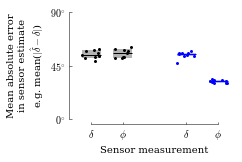

In [9]:
#fig = plt.figure(figsize=(3,2))
#ax = fig.add_subplot(111)

layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])
ax = layout.axes[('gamma', 'gamma')]

fpl.scatter_box(ax, 0, errors_align_psi[:,2]*180/np.pi, color='black', markersize=3)
fpl.scatter_box(ax, 1, errors_align_psi[:,0]*180/np.pi, color='black', markersize=3)


fpl.scatter_box(ax, 3, errors_align_gamma[:,2]*180/np.pi, color='blue', markersize=3)
fpl.scatter_box(ax, 4, errors_align_gamma[:,0]*180/np.pi, color='blue', markersize=3)


xticks = [0,1,3,4]
yticks = [0, 45, 90]
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks=yticks,
                                 xticks=xticks,
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=0.5)

xticklabels = [r'$\delta$', r'$\phi$', r'$\delta$', r'$\phi$']
ax.set_xticklabels(xticklabels)# , rotation=90)

ax.set_yticklabels(['$0^{\circ}$', '$45^{\circ}$', '$90^{\circ}$'])
ax.set_ylabel('Mean absolute error\nin sensor estimate\ne.g. mean($|\hat{\delta}-\delta|$)')
ax.set_xlabel('Sensor measurement')

layout.append_figure_to_layer(layout.figures['gamma'], 'gamma', cleartarget=True)
layout.write_svg(fififig)

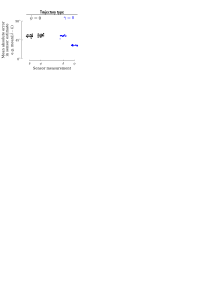

In [10]:
from IPython.display import display,SVG
display(SVG(fififig))